In [1]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import string as st
from wordcloud import STOPWORDS
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


# Cleaning the data

In [3]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: count, dtype: int64

In [4]:
df.shape

(39869, 2)

In [5]:
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [6]:
df['clean_text'] = df['tweet_text'].apply(lambda x: remove_punct(x))

In [7]:
df.drop(columns=["tweet_text"], inplace=True)

In [8]:
df.head(10)

,cyberbullying_type,clean_text
0,not_cyberbullying,In other words katandandre your food was crapi...
1,not_cyberbullying,Why is aussietv so white MKR theblock ImACeleb...
2,not_cyberbullying,XochitlSuckkks a classy whore Or more red velv...
3,not_cyberbullying,JasonGio meh P thanks for the heads up but no...
4,not_cyberbullying,RudhoeEnglish This is an ISIS account pretendi...
5,not_cyberbullying,Raja5aab Quickieleaks Yes the test of god is t...
6,not_cyberbullying,Itu sekolah ya bukan tempat bully Ga jauh kaya...
7,not_cyberbullying,Karma I hope it bites Kat on the butt She is j...
8,not_cyberbullying,stockputout everything but mostly my priest
9,not_cyberbullying,Rebecca Black Drops Out of School Due to Bullying


In [9]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [10]:
df['clean_text'] = df['clean_text'].apply(lambda msg : tokenize(msg))
df.head(10)

,cyberbullying_type,clean_text
0,not_cyberbullying,"[in, other, words, katandandre, your, food, wa..."
1,not_cyberbullying,"[why, is, aussietv, so, white, mkr, theblock, ..."
2,not_cyberbullying,"[xochitlsuckkks, a, classy, whore, or, more, r..."
3,not_cyberbullying,"[jasongio, meh, p, thanks, for, the, heads, up..."
4,not_cyberbullying,"[rudhoeenglish, this, is, an, isis, account, p..."
5,not_cyberbullying,"[raja5aab, quickieleaks, yes, the, test, of, g..."
6,not_cyberbullying,"[itu, sekolah, ya, bukan, tempat, bully, ga, j..."
7,not_cyberbullying,"[karma, i, hope, it, bites, kat, on, the, butt..."
8,not_cyberbullying,"[stockputout, everything, but, mostly, my, pri..."
9,not_cyberbullying,"[rebecca, black, drops, out, of, school, due, ..."


In [11]:
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [12]:
df['clean_text'] = df['clean_text'].apply(lambda x : remove_small_words(x))
df.head(10)

,cyberbullying_type,clean_text
0,not_cyberbullying,"[other, words, katandandre, your, food, crapil..."
1,not_cyberbullying,"[aussietv, white, theblock, imacelebrityau, to..."
2,not_cyberbullying,"[xochitlsuckkks, classy, whore, more, velvet, ..."
3,not_cyberbullying,"[jasongio, thanks, heads, concerned, about, an..."
4,not_cyberbullying,"[rudhoeenglish, this, isis, account, pretendin..."
5,not_cyberbullying,"[raja5aab, quickieleaks, test, that, good, ind..."
6,not_cyberbullying,"[sekolah, bukan, tempat, bully, jauh, kaya, ne..."
7,not_cyberbullying,"[karma, hope, bites, butt, just, nasty]"
8,not_cyberbullying,"[stockputout, everything, mostly, priest]"
9,not_cyberbullying,"[rebecca, black, drops, school, bullying]"


In [13]:
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [14]:
df['clean_text'] = df['clean_text'].apply(lambda x : remove_stopwords(x))
df.head(10)

,cyberbullying_type,clean_text
0,not_cyberbullying,"[words, katandandre, food, crapilicious]"
1,not_cyberbullying,"[aussietv, white, theblock, imacelebrityau, to..."
2,not_cyberbullying,"[xochitlsuckkks, classy, whore, velvet, cupcakes]"
3,not_cyberbullying,"[jasongio, thanks, heads, concerned, another, ..."
4,not_cyberbullying,"[rudhoeenglish, isis, account, pretending, kur..."
5,not_cyberbullying,"[raja5aab, quickieleaks, test, good, indiffere..."
6,not_cyberbullying,"[sekolah, bukan, tempat, bully, jauh, kaya, ne..."
7,not_cyberbullying,"[karma, hope, bites, butt, nasty]"
8,not_cyberbullying,"[stockputout, everything, mostly, priest]"
9,not_cyberbullying,"[rebecca, black, drops, school, bullying]"


In [15]:
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [16]:
df['clean_text'] = df['clean_text'].apply(lambda x : lemmatize(x))
df.head(10)

,cyberbullying_type,clean_text
0,not_cyberbullying,"[word, katandandre, food, crapilicious]"
1,not_cyberbullying,"[aussietv, white, theblock, imacelebrityau, to..."
2,not_cyberbullying,"[xochitlsuckkks, classy, whore, velvet, cupcake]"
3,not_cyberbullying,"[jasongio, thanks, head, concerned, another, a..."
4,not_cyberbullying,"[rudhoeenglish, isi, account, pretending, kurd..."
5,not_cyberbullying,"[raja5aab, quickieleaks, test, good, indiffere..."
6,not_cyberbullying,"[sekolah, bukan, tempat, bully, jauh, kaya, ne..."
7,not_cyberbullying,"[karma, hope, bite, butt, nasty]"
8,not_cyberbullying,"[stockputout, everything, mostly, priest]"
9,not_cyberbullying,"[rebecca, black, drop, school, bullying]"


In [17]:
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [18]:
df['clean_text'] = df['clean_text'].apply(lambda x : return_sentences(x))
df.head(10)

,cyberbullying_type,clean_text
0,not_cyberbullying,word katandandre food crapilicious
1,not_cyberbullying,aussietv white theblock imacelebrityau today s...
2,not_cyberbullying,xochitlsuckkks classy whore velvet cupcake
3,not_cyberbullying,jasongio thanks head concerned another angry d...
4,not_cyberbullying,rudhoeenglish isi account pretending kurdish a...
5,not_cyberbullying,raja5aab quickieleaks test good indifferent we...
6,not_cyberbullying,sekolah bukan tempat bully jauh kaya neraka
7,not_cyberbullying,karma hope bite butt nasty
8,not_cyberbullying,stockputout everything mostly priest
9,not_cyberbullying,rebecca black drop school bullying


In [19]:
text_len = []
for text in df.clean_text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [20]:
df['text_len'] = text_len

In [21]:
df.head(10)

,cyberbullying_type,clean_text,text_len
0,not_cyberbullying,word katandandre food crapilicious,4
1,not_cyberbullying,aussietv white theblock imacelebrityau today s...,9
2,not_cyberbullying,xochitlsuckkks classy whore velvet cupcake,5
3,not_cyberbullying,jasongio thanks head concerned another angry d...,8
4,not_cyberbullying,rudhoeenglish isi account pretending kurdish a...,9
5,not_cyberbullying,raja5aab quickieleaks test good indifferent we...,10
6,not_cyberbullying,sekolah bukan tempat bully jauh kaya neraka,7
7,not_cyberbullying,karma hope bite butt nasty,5
8,not_cyberbullying,stockputout everything mostly priest,4
9,not_cyberbullying,rebecca black drop school bullying,5


# EDA
---

In [22]:
df.isna().sum()

cyberbullying_type    0
clean_text            0
text_len              0
dtype: int64

In [23]:
df["clean_text"].duplicated().sum()

455

In [24]:
print(df.shape)
df.drop_duplicates("clean_text", inplace=True)
df.shape

(39869, 3)


(39414, 3)

In [25]:
df["clean_text"].duplicated().sum()

0

In [26]:
df.sort_values(by=["text_len"], ascending=False, inplace=True)

In [27]:
df.head(10)

,cyberbullying_type,clean_text,text_len
44035,ethnicity,black white trying live like nigger pahahahaha...,170
45165,ethnicity,hermdiggz “tayyoung fuck obama dumb nigger” bi...,140
1317,not_cyberbullying,eurekalertaaas researcher push import antibull...,140
33724,age,dont feel guilty killing feel guilty enjoyed t...,128
10922,gender,dont make rape joke dont make joke joke okay d...,125
47037,ethnicity,purelyambition sooo tracepeterson fuck obama d...,108
15621,gender,ufcpride40 terry bean prominent activist major...,106
14168,gender,call function process punk self esteem punk ca...,101
3030,not_cyberbullying,embellished afternoon moustachioed feint flick...,90
4846,not_cyberbullying,andreagcav viviaanajim recuerdas como nosotras...,77


In [28]:
print(df.shape)
df = df[df['text_len'] < df['text_len'].quantile(0.995)]
df = df[df['text_len'] > 0]
df.shape

(39414, 3)


(39140, 3)

In [29]:
df.head(10)

,cyberbullying_type,clean_text,text_len
22348,religion,liar sunni muslim pray regularly ahmadi mosque...,28
8435,gender,hate can’t punch people internet funny gay mak...,28
19307,religion,wolf sheep clothing soros money support farlef...,28
37097,age,rioting portland day there finally resistance ...,28
17724,religion,never ever give always standing whatever pure ...,28
22213,religion,language especially ancient one important don’...,28
23743,religion,fortunately done part helping unlike sitting a...,28
19257,religion,people literally don’t choice everywhere like ...,28
23393,religion,need present good character like modi amitshah...,28
42554,ethnicity,barely anything said true never said racism re...,28


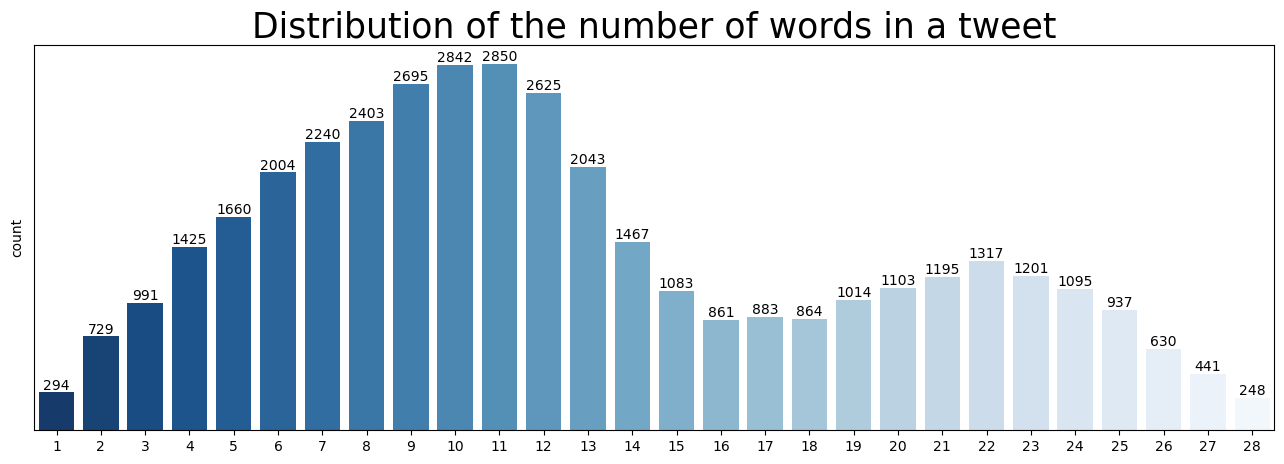

In [30]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x=df['text_len'], palette='Blues_r')
plt.title('Distribution of the number of words in a tweet', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [31]:
all_text = ' '.join(df['clean_text'].values)
words = all_text.split()

In [32]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)

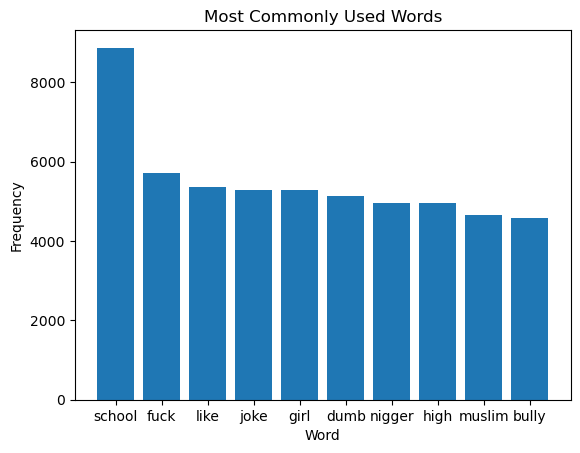

In [33]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

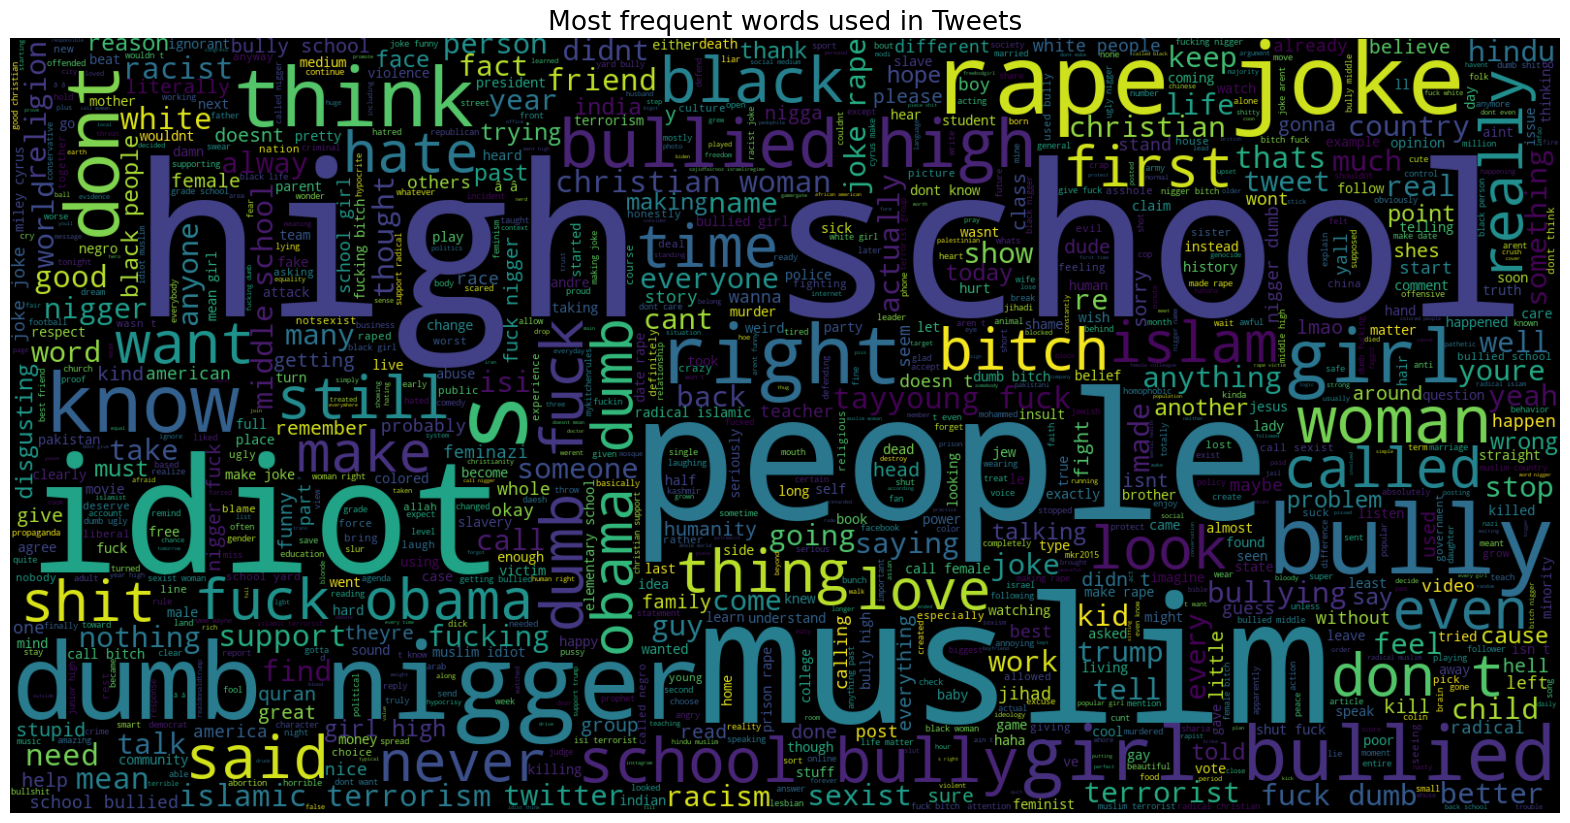

In [34]:
#This can also be shown with a wordcloud
text = ' '.join([word for word in df['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

# Preparing the data for modelling

In [35]:
df['cyberbullying_type'] = df['cyberbullying_type'].replace({'religion':'r','age':'a','ethnicity':'e','gender':'g','not_cyberbullying':'n'})

In [36]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'])
y = df['cyberbullying_type']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling
---

# 1. Logistic Regression

In [38]:
#Train logistic regression
lr_clf = LogisticRegression(max_iter = 1000, random_state=42)
lr_clf.fit(X_train, y_train, )

LogisticRegression(max_iter=1000, random_state=42)

In [39]:
#Testing logistic regression
y_pred = lr_clf.predict(X_test)

In [40]:
#Checking logistic regression's accuracy
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc1)

Accuracy: 0.9253960143076136


In [41]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="PuBuGn", fmt='g', cbar=False, annot_kws={"size":20})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=14) 
    ax.yaxis.set_ticklabels(labels, fontsize=12.5)
    ax.set_ylabel('Actual value', fontsize=20)
    ax.set_xlabel('Predicted value', fontsize=20)
    plt.show()

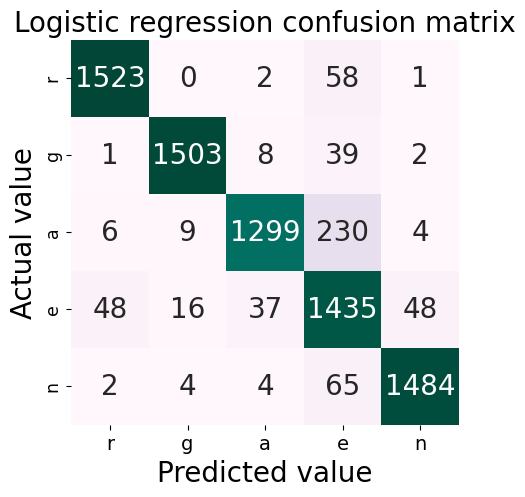

In [42]:
#Showing logistic regression's confusion matrix
conf_matrix(y_test, y_pred,'Logistic regression confusion matrix', df['cyberbullying_type'].unique())

In [43]:
#Showing logistic regression's classification report
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           a       0.96      0.96      0.96      1584
           e       0.98      0.97      0.97      1553
           g       0.96      0.84      0.90      1548
           n       0.79      0.91      0.84      1584
           r       0.96      0.95      0.96      1559

    accuracy                           0.93      7828
   macro avg       0.93      0.93      0.93      7828
weighted avg       0.93      0.93      0.93      7828



# 2. Decision tree

In [44]:
#Train a decision tree
tree_clf = tree.DecisionTreeClassifier(random_state=42)
tree_clf = tree_clf.fit(X_train, y_train)

In [45]:
#Testing the decision tree
y_pred = tree_clf.predict(X_test)

In [46]:
#Checking decision tree's accuracy
acc2 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc2)

Accuracy: 0.9003576903423608


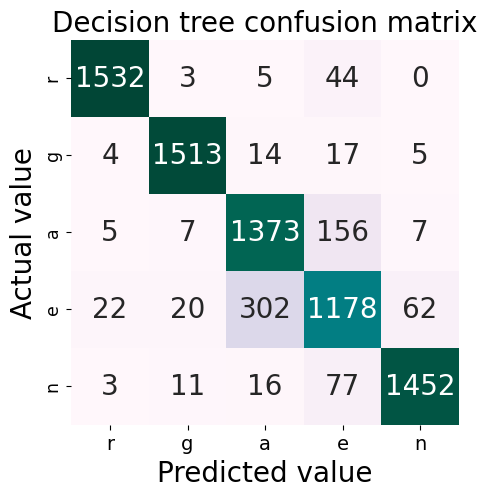

In [47]:
#Showing decision tree's confusion matrix
conf_matrix(y_test, y_pred,'Decision tree confusion matrix', df['cyberbullying_type'].unique())

In [48]:
#Showing decision tree's classification report
report2 = classification_report(y_test, y_pred)
print(report2)

              precision    recall  f1-score   support

           a       0.98      0.97      0.97      1584
           e       0.97      0.97      0.97      1553
           g       0.80      0.89      0.84      1548
           n       0.80      0.74      0.77      1584
           r       0.95      0.93      0.94      1559

    accuracy                           0.90      7828
   macro avg       0.90      0.90      0.90      7828
weighted avg       0.90      0.90      0.90      7828



# 3. Naive Bayes

In [49]:
#Train multinomial Naive Bayes
nb_clf = MultinomialNB()
nb_clf = nb_clf.fit(X_train, y_train)

In [50]:
#Testing Naive Bayes
y_pred = nb_clf.predict(X_test)

In [51]:
#Checking Naive Bayes accuracy
acc3 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc3)

Accuracy: 0.835334695963209


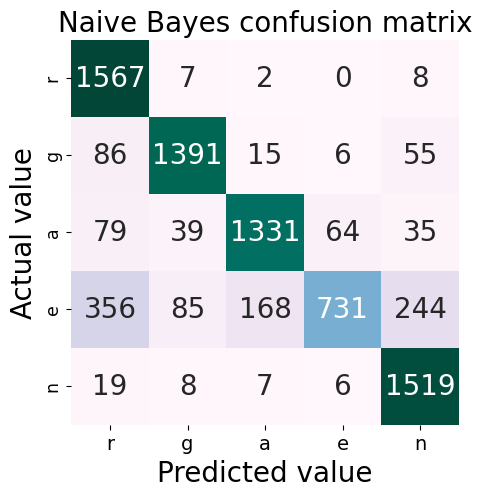

In [52]:
#Showing Naive Bayes confusion matrix
conf_matrix(y_test, y_pred,'Naive Bayes confusion matrix', df['cyberbullying_type'].unique())

In [53]:
#Showing Naive Bayes classification report
report3 = classification_report(y_test, y_pred)
print(report3)

              precision    recall  f1-score   support

           a       0.74      0.99      0.85      1584
           e       0.91      0.90      0.90      1553
           g       0.87      0.86      0.87      1548
           n       0.91      0.46      0.61      1584
           r       0.82      0.97      0.89      1559

    accuracy                           0.84      7828
   macro avg       0.85      0.84      0.82      7828
weighted avg       0.85      0.84      0.82      7828



# 4. K Nearest Neighbor

In [54]:
from sklearn import metrics
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Testing Accuracy')

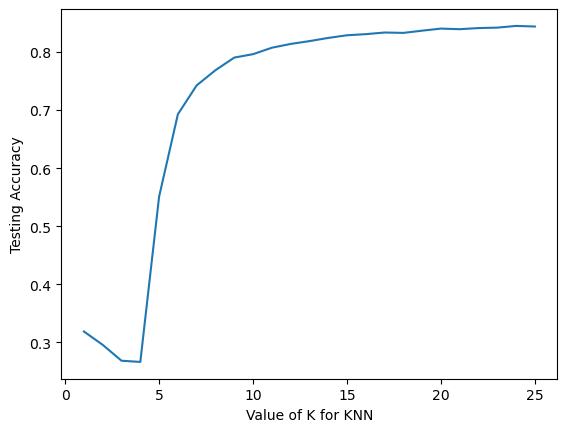

In [55]:
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [56]:
#Train Knn with k=14
knn_clf = KNeighborsClassifier(n_neighbors=14)
knn_clf =knn_clf.fit(X_train, y_train)

In [57]:
#Testing Knn
y_pred = knn_clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
#Checking Knn's accuracy
acc4 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc4)

Accuracy: 0.8243484925907001


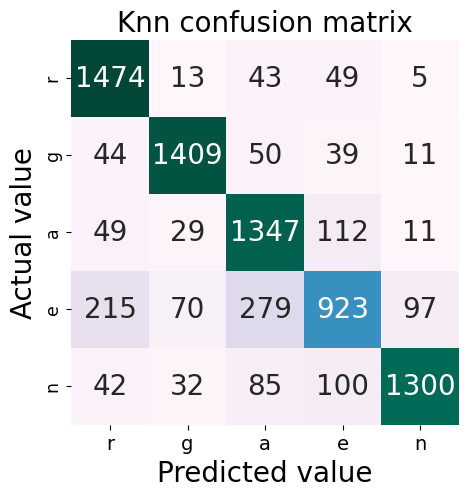

In [59]:
#Showing Knn's confusion matrix
conf_matrix(y_test, y_pred,'Knn confusion matrix', df['cyberbullying_type'].unique())

In [60]:
#Showing Knn's classification report
report4 = classification_report(y_test, y_pred)
print(report4)

              precision    recall  f1-score   support

           a       0.81      0.93      0.87      1584
           e       0.91      0.91      0.91      1553
           g       0.75      0.87      0.80      1548
           n       0.75      0.58      0.66      1584
           r       0.91      0.83      0.87      1559

    accuracy                           0.82      7828
   macro avg       0.83      0.82      0.82      7828
weighted avg       0.83      0.82      0.82      7828



# 5. Linear SVM

In [61]:
#Train linear SVM
svm_clf = svm.SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [62]:
#Testing linear SVM
y_pred = svm_clf.predict(X_test)

In [63]:
#Checking linear SVM's accuracy
acc5 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc5)

Accuracy: 0.9326775677056719


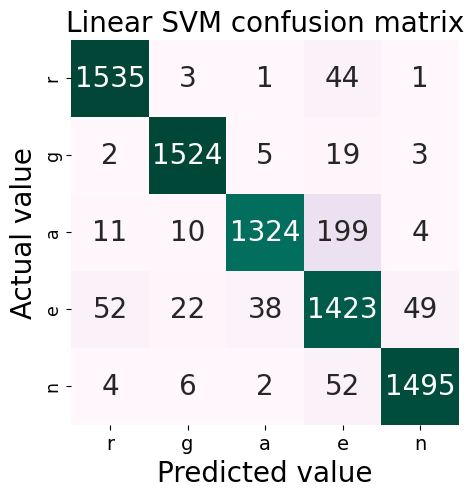

In [64]:
#Showing linear SVM's confusion matrix
conf_matrix(y_test, y_pred,'Linear SVM confusion matrix', df['cyberbullying_type'].unique())

In [65]:
#Showing linear SVM's classification report
report5 = classification_report(y_test, y_pred)
print(report5)

              precision    recall  f1-score   support

           a       0.96      0.97      0.96      1584
           e       0.97      0.98      0.98      1553
           g       0.97      0.86      0.91      1548
           n       0.82      0.90      0.86      1584
           r       0.96      0.96      0.96      1559

    accuracy                           0.93      7828
   macro avg       0.94      0.93      0.93      7828
weighted avg       0.94      0.93      0.93      7828



# 6. RBF SVM

In [66]:
#Trainf RBF SVM
rbf_svm_clf = svm.SVC(kernel='rbf', random_state=42)
rbf_svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [67]:
#Testing RBF SVM
y_pred = rbf_svm_clf.predict(X_test)

In [68]:
#Checking RBF SVM's accuracy
acc6 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc6)

Accuracy: 0.9252682677567705


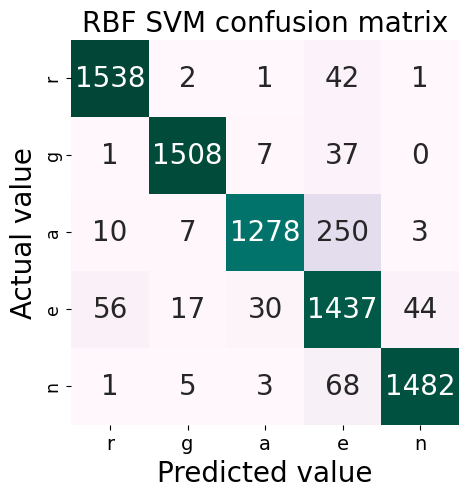

In [69]:
#Showing RBF SVM's confusion matrix
conf_matrix(y_test, y_pred,'RBF SVM confusion matrix', df['cyberbullying_type'].unique())

In [70]:
#Showing RBF SVM's classification report
report6 = classification_report(y_test, y_pred)
print(report6)

              precision    recall  f1-score   support

           a       0.96      0.97      0.96      1584
           e       0.98      0.97      0.98      1553
           g       0.97      0.83      0.89      1548
           n       0.78      0.91      0.84      1584
           r       0.97      0.95      0.96      1559

    accuracy                           0.93      7828
   macro avg       0.93      0.93      0.93      7828
weighted avg       0.93      0.93      0.93      7828



# Comparing the models

In [71]:
results = {'LogisticRegression':acc1, 'DecisionTree':acc2, 'NaiveBayes':acc3, 'KNeighbors':acc4,'LinearSVM':acc5, 'RbfSVM':acc6}

In [72]:
results

{'LogisticRegression': 0.9253960143076136,
 'DecisionTree': 0.9003576903423608,
 'NaiveBayes': 0.835334695963209,
 'KNeighbors': 0.8243484925907001,
 'LinearSVM': 0.9326775677056719,
 'RbfSVM': 0.9252682677567705}

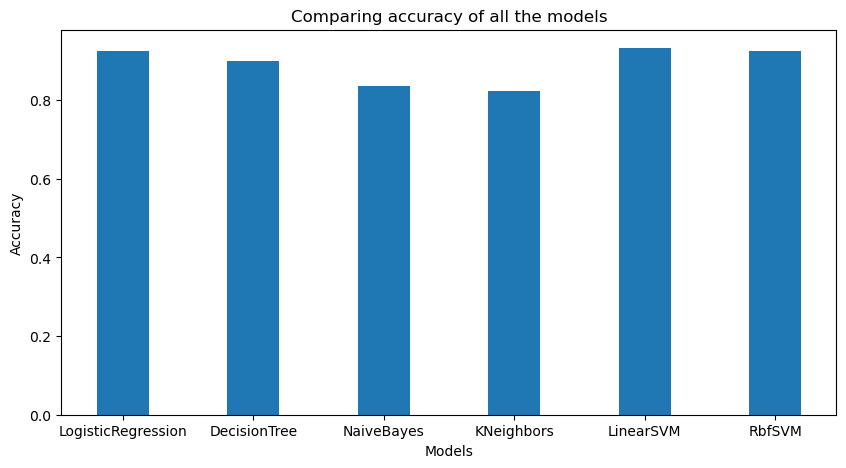

In [73]:
model = list(results.keys())
accuracy = list(results.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(model, accuracy, width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparing accuracy of all the models")
plt.show()

# Explanation

In [74]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [75]:
df.head()

,cyberbullying_type,clean_text,text_len
22348,r,liar sunni muslim pray regularly ahmadi mosque...,28
8435,g,hate can’t punch people internet funny gay mak...,28
19307,r,wolf sheep clothing soros money support farlef...,28
37097,a,rioting portland day there finally resistance ...,28
17724,r,never ever give always standing whatever pure ...,28


In [76]:
subset1 = df[df['cyberbullying_type']=='g']
text_gender = subset1.clean_text.values

In [77]:
unigrams = get_top_n_gram(text_gender,(1,1),10)
bigrams = get_top_n_gram(text_gender,(2,2),10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [78]:
unigrams

[('joke', 5141),
 ('rape', 4027),
 ('woman', 1158),
 ('bitch', 1105),
 ('call', 1100),
 ('female', 1060),
 ('people', 979),
 ('sexist', 948),
 ('make', 932),
 ('dont', 654)]

In [79]:
bigrams

[('rape joke', 2218),
 ('joke rape', 500),
 ('joke joke', 262),
 ('call female', 235),
 ('make rape', 222),
 ('prison rape', 188),
 ('miley cyrus', 188),
 ('make joke', 180),
 ('call bitch', 163),
 ('date rape', 154)]

In [80]:
subset2 = df[df['cyberbullying_type']=='r']
text_religion = subset2.clean_text.values

In [81]:
unigrams = get_top_n_gram(text_religion,(1,1),10)
bigrams = get_top_n_gram(text_religion,(2,2),10)

In [82]:
unigrams

[('muslim', 4552),
 ('idiot', 3015),
 ('christian', 2035),
 ('terrorist', 1340),
 ('right', 1264),
 ('woman', 1225),
 ('islamic', 1216),
 ('islam', 1163),
 ('terrorism', 1080),
 ('radical', 1058)]

In [83]:
bigrams

[('christian woman', 817),
 ('islamic terrorism', 793),
 ('radical islamic', 203),
 ('muslim idiot', 173),
 ('muslim country', 128),
 ('support radical', 122),
 ('radical christian', 116),
 ('woman right', 108),
 ('good christian', 106),
 ('christian support', 101)]

In [84]:
subset3 = df[df['cyberbullying_type']=='a']
text_age = subset3.clean_text.values

In [85]:
unigrams = get_top_n_gram(text_age,(1,1),10)
bigrams = get_top_n_gram(text_age,(2,2),10)

In [86]:
unigrams

[('school', 8332),
 ('high', 4816),
 ('girl', 4537),
 ('bullied', 4295),
 ('bully', 4201),
 ('people', 923),
 ('middle', 705),
 ('friend', 612),
 ('year', 578),
 ('kid', 522)]

In [87]:
bigrams

[('high school', 4399),
 ('girl bullied', 1474),
 ('bullied high', 1372),
 ('school bully', 1201),
 ('middle school', 568),
 ('girl high', 431),
 ('bully school', 381),
 ('school bullied', 299),
 ('school girl', 266),
 ('bullied girl', 253)]

In [88]:
subset4 = df[df['cyberbullying_type']=='e']
text_ethnicity = subset4.clean_text.values

In [89]:
unigrams = get_top_n_gram(text_ethnicity,(1,1),10)
bigrams = get_top_n_gram(text_ethnicity,(2,2),10)

In [90]:
unigrams

[('nigger', 5436),
 ('fuck', 5232),
 ('dumb', 5004),
 ('black', 2078),
 ('white', 1503),
 ('people', 1156),
 ('obama', 1069),
 ('bitch', 978),
 ('tayyoung', 884),
 ('called', 869)]

In [91]:
bigrams

[('dumb nigger', 2277),
 ('dumb fuck', 1049),
 ('fuck obama', 936),
 ('obama dumb', 924),
 ('tayyoung fuck', 878),
 ('fuck dumb', 707),
 ('black people', 341),
 ('fuck nigger', 340),
 ('nigger fuck', 303),
 ('nigger dumb', 258)]